In [58]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder

In [59]:
filename = 'Customer.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:

enc = OrdinalEncoder()
numeric_address = enc.fit_transform(pdf[['Gender']])
pdf['Gender'] = numeric_address
pdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1.0,19,15,39
1,2,1.0,21,15,81
2,3,0.0,20,16,6
3,4,0.0,23,16,77
4,5,0.0,31,17,40


In [61]:
X = pdf.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[0: 5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

In [62]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 1000)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [63]:
pdf["labales_clustering"] = labels
pdf.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labales_clustering
0,1,1.0,19,15,39,3
1,2,1.0,21,15,81,0
2,3,0.0,20,16,6,3
3,4,0.0,23,16,77,0
4,5,0.0,31,17,40,3


In [69]:
X = pdf.values[:,1:]

Shape of area: (200,)


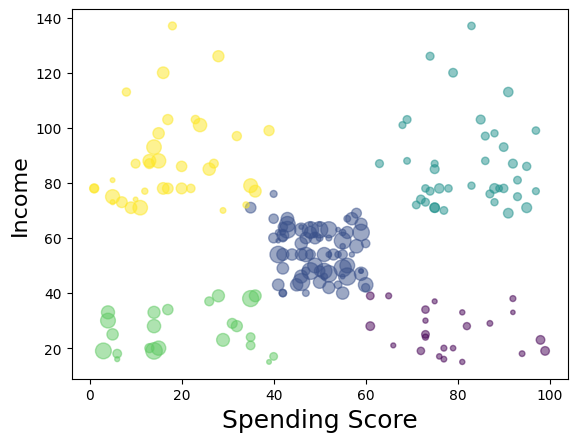

In [81]:
area = (np.pi * (X[:, 1]) ** 2) / 100
area = area.astype(float)

# Check the shape of area
print("Shape of area:", area.shape)

# Plot the scatter plot
plt.scatter(X[:, 3], X[:, 2], s=area, c=labels, alpha=0.5)
plt.xlabel('Spending Score', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()